## Predicting price of Airbnb in New York

### I was hoping to make a similar model to google flights  apllication which gives user the indication if it's the best possible price for that flight based on the time of the year, class, and time of the day. The Dataset is available on Kaggle. 

In [63]:
# necessary imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv(r'C:\Users\Rahul Miglani\Untitled Folder\AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#Drop unnecessary features 
df.drop(['id', 'name','host_name','last_review'], axis = 1, inplace = True)

In [11]:
# After removing the 4 features we are down to 12 features 
df.shape

(48895, 12)

In [12]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [13]:
#fill the nan reviews per month with zeroes ??
df['reviews_per_month'].fillna((df['reviews_per_month'].mean()),inplace = True)
#sanity check 
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

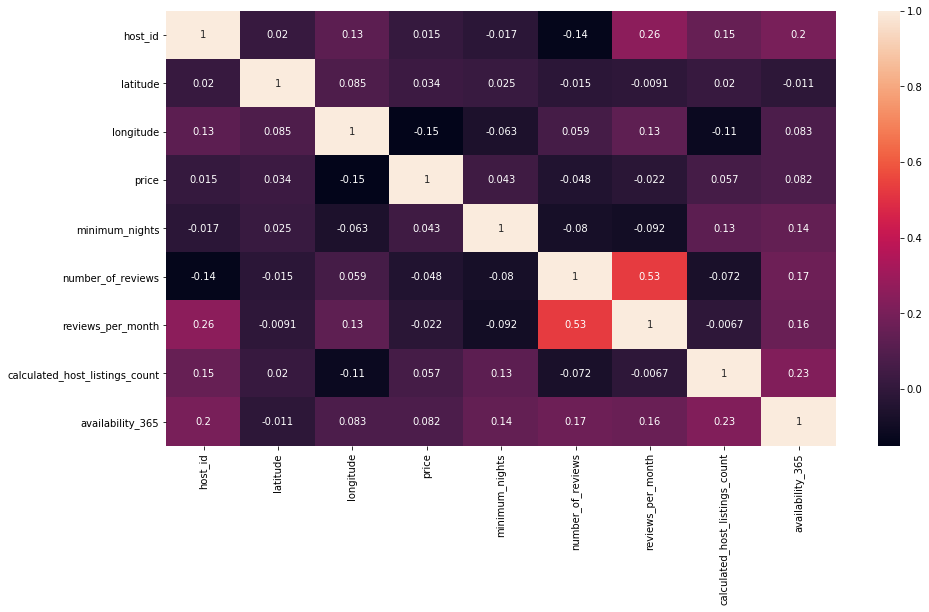

In [14]:
corr = df.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

#### Outliers

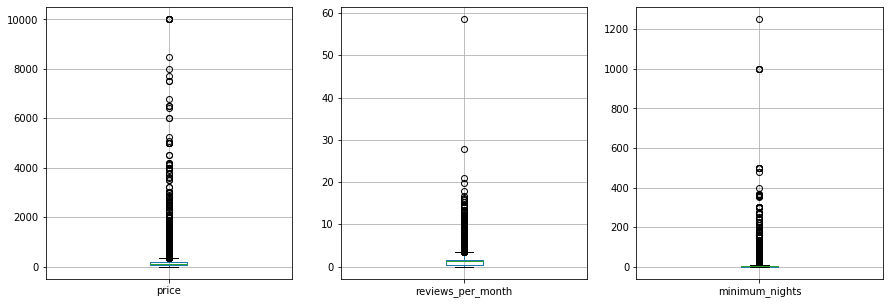

In [15]:
# Boxplots of numerical variables
plt.figure(figsize=(15,5))
for i, col in enumerate(['price','reviews_per_month','minimum_nights'], start=1):
    plt.subplot(1, 3, i)
    df.boxplot(col)

In [16]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [17]:
cols = ['price','reviews_per_month','minimum_nights']
for col in cols:
    outlier_count(col)

---------------price---------------
Number of outliers: 2972
Percent of data that is outlier: 6.08%
---------------reviews_per_month---------------
Number of outliers: 4103
Percent of data that is outlier: 8.39%
---------------minimum_nights---------------
Number of outliers: 6607
Percent of data that is outlier: 13.51%


In [18]:
def winsor(col, l_l=0, u_l=0.01):
    winsorized = winsorize(df[col],limits = (l_l, u_l))
    wins_dict[col] = winsorized
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.boxplot(df[col])
    plt.title('original {}'.format(col))
    plt.subplot(122)
    plt.boxplot(winsorized)
    plt.title('winsorized''{}'.format(col))
    plt.show()

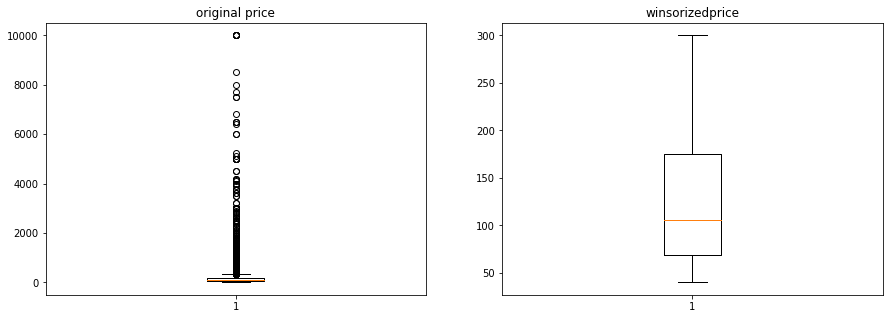

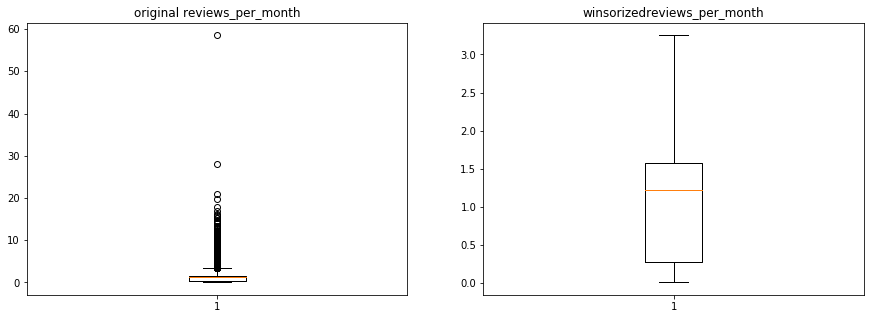

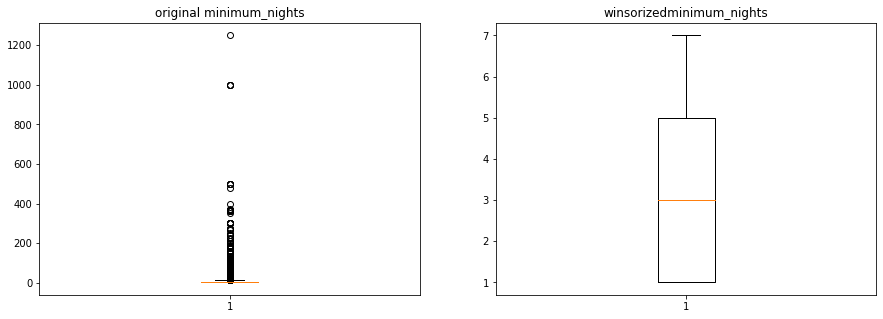

In [21]:
wins_dict = {}
winsor(cols[0],u_l = 0.07,l_l = 0.05)
winsor(cols[1],u_l = 0.10)
winsor(cols[2],u_l = 0.17,l_l = 0.1)

In [20]:
from scipy.stats.mstats import winsorize
df['win_price'] = winsorize(df["price"], (0.07, 0.10))

In [22]:
df['win_reviews_per_month'] = winsorize(df['reviews_per_month'],(0,0.10))

In [23]:
df['win_minimum_nights'] = winsorize(df['minimum_nights'], (0.17,0.2))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
win_price                         48895 non-null int64
win_reviews_per_month             48895 non-null float64
win_minimum_nights                48895 non-null int64
dtypes: float64(4), int64(8), object(3)
memory usage: 5

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
win_price                         48895 non-null int64
win_reviews_per_month             48895 non-null float64
win_minimum_nights                48895 non-null int64
dtypes: float64(4), int64(8), object(3)
memory usage: 5

### Univariate analysis

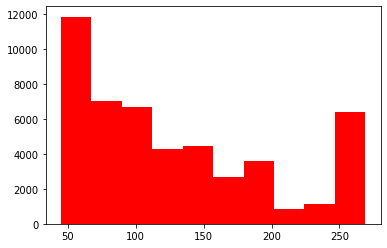

In [26]:
# Let's take a look at our target variable ??
plt.hist(df['win_price'],color = 'red')

plt.show()

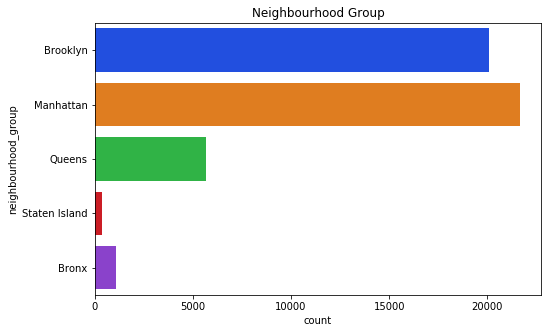

In [27]:
# which neighborhood has the most listings
sns.countplot(y = df['neighbourhood_group'],palette="bright")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.title('Neighbourhood Group')
plt.show()

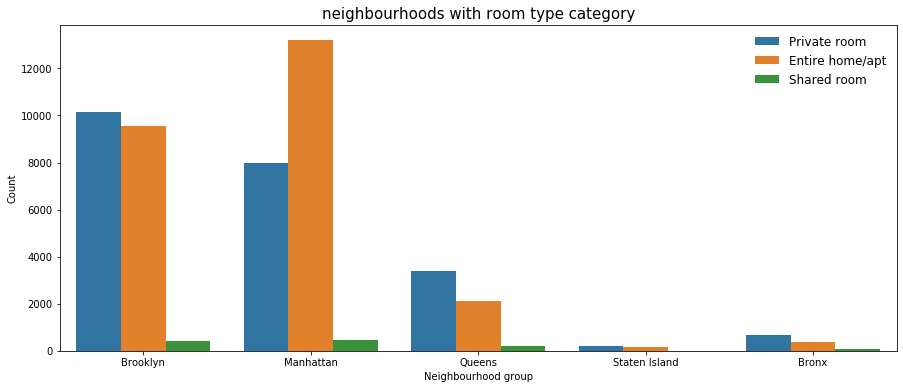

In [28]:
# Neighbourhood groups with counts with category room_type

plt.figure(figsize=(15,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title('neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

Text(0, 0.5, 'Price')

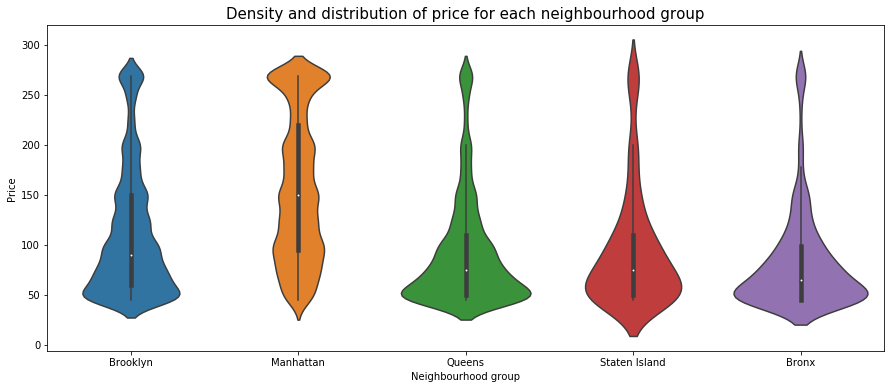

In [29]:
#distribution of price

plt.figure(figsize=(15,6))
sns.violinplot(data=df[df.win_price <500], x='neighbourhood_group', y='win_price')
plt.title('Density and distribution of price for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

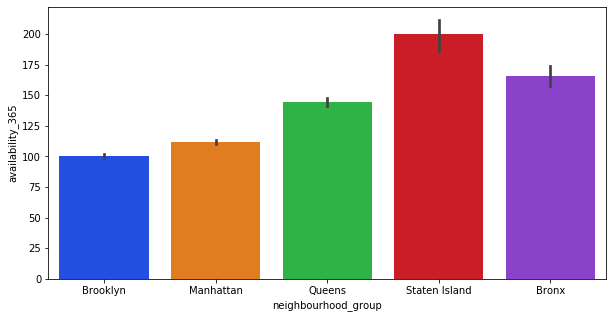

In [60]:
# neighbourhood and availability
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x='neighbourhood_group',y='availability_365',palette='bright')
plt.savefig('sample.pdf')

0


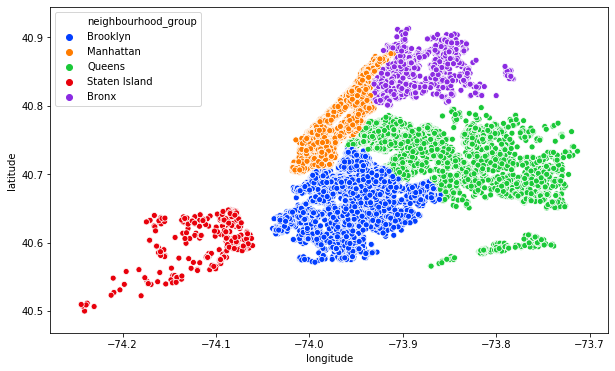

In [31]:
#neighbourhood group with locations
from time import time
start = time()
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,palette = 'bright',hue=df.neighbourhood_group)
plt.ioff()
print(int(time()-start))

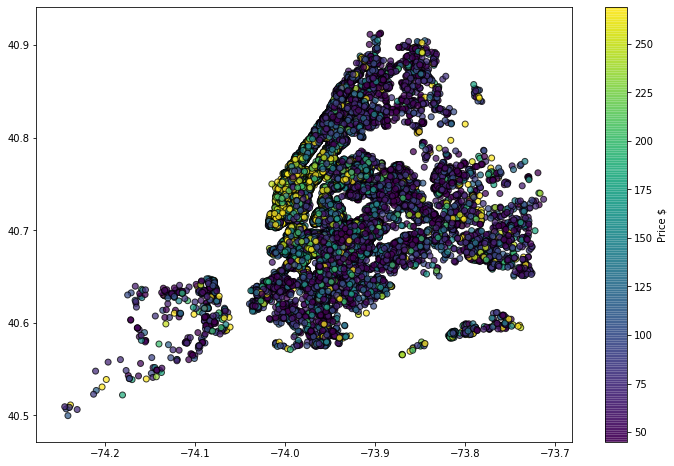

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.win_price, edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price $')

In [33]:
#Here we are using geopandas to bring in a base layer of NYC boroughs
nyc = gpd.read_file(r'C:\Users\Rahul Miglani\Untitled Folder\nynta_19d\nynta.shp')
nyc.head(5)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904797,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.712074,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335574,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,1,Manhattan,061,MN06,Manhattanville,17040.685413,1.064708e+07,"POLYGON ((999174.261 238490.105, 999084.570 23..."


In [34]:
#Rename the column to boroname, so that we can join the data to it on a common field
#Get a count by borough
borough_count = df.groupby('neighbourhood_group').agg('count').reset_index()
nyc.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)
geo = nyc.merge(borough_count, on='neighbourhood_group')

In [35]:
geo.head()

,BoroCode,neighbourhood_group,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,host_id,neighbourhood,...,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,win_price,win_reviews_per_month,win_minimum_nights
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",20104,20104,...,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104
1,3,Brooklyn,047,BK25,Homecrest,27514.022916,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",20104,20104,...,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104
2,3,Brooklyn,047,BK44,Madison,26237.257858,2.737916e+07,"POLYGON ((1001593.410 160996.441, 1001382.708 ...",20104,20104,...,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104
3,3,Brooklyn,047,BK41,Kensington-Ocean Parkway,20800.752357,1.589330e+07,"POLYGON ((992341.696 174770.869, 992361.536 17...",20104,20104,...,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104
4,3,Brooklyn,047,BK95,Erasmus,18756.701865,1.452260e+07,"POLYGON ((998608.334 171942.436, 998339.702 17...",20104,20104,...,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104


(905464.7390289307, 1075092.8785858154, 112485.76061604357, 280480.4146439812)

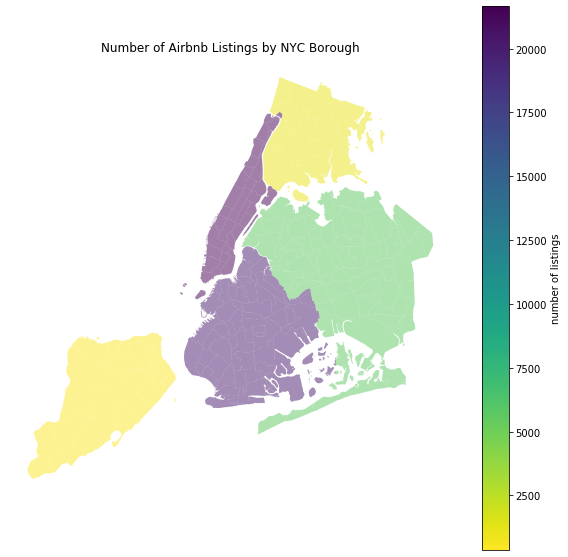

In [36]:
#Plot the count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
geo.plot(column='host_id',cmap='viridis_r', alpha=.5, ax=ax, legend=True,
         legend_kwds={'label': "number of listings",
                       'orientation': "vertical"})
   
plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('off')

<BarContainer object of 10 artists>

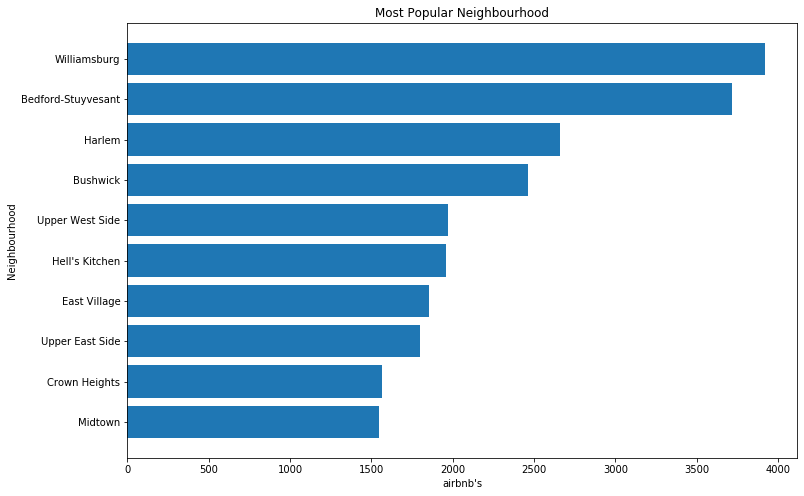

In [37]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood")
plt.xlabel("airbnb's")

plt.barh(x, y)

In [38]:
df = pd.concat([df,pd.get_dummies(df.neighbourhood_group, prefix='neighbourhood_group')], axis = 1)
df = pd.concat([df,pd.get_dummies(df.neighbourhood, prefix='neighbourhood')], axis = 1)
df = pd.concat([df,pd.get_dummies(df.room_type, prefix='room_type')], axis = 1)
dummy_column_names = list(pd.get_dummies(df.neighbourhood_group, prefix="neighbourhood_group").columns)
dummy_column_names = list(pd.get_dummies(df.neighbourhood, prefix="neighbourhood").columns)
dummy_column_names = list(pd.get_dummies(df.room_type, prefix="room_type").columns)

In [39]:
X = df[['host_id', 'latitude', 'longitude', 'win_minimum_nights', 'win_reviews_per_month']+dummy_column_names]
Y = np.log1p(df['win_price'])

In [40]:
#Getting Test and Training Set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=353)

In [41]:
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 1. Linear regression model 

In [49]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_preds_train = reg.predict(X_train)
y_preds_test = reg.predict(X_test)
print("R-squared of the model in training set is: {}".format(reg.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(reg.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.5215018957390098
-----Test set statistics-----
R-squared of the model in test set is: 0.5127308036240548
Mean absolute error of the prediction is: 0.314813524366931
Mean squared error of the prediction is: 0.1532258077835212
Root mean squared error of the prediction is: 0.39144068233069645
Mean absolute percentage error of the prediction is: 6.778080345103307


In [43]:
# Perform 6-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X_train, y_train, cv=6)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.53407801 0.52836448 0.49633322 0.5250206  0.52790887 0.51530008]
Accuracy: 0.52 (+/- 0.02)


#### The linear regression model is able to generalize well with similar r-sqaures for both test and train dataset. however, the r-squared of 0.51 is very low.

### 2.SVR

In [50]:
# Create the Support Vector Regression model
start = time()
svr = SVR(kernel='rbf', gamma=1e-3, C=150, epsilon=0.3)
svr.fit(X_train, y_train)

y_svr_pred = svr.predict(X_test)
y_preds_train = svr.predict(X_train)
y_preds_test = svr.predict(X_test)
print("R-squared of the model in training set is: {}".format(reg.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(reg.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print(int(time()-start))

R-squared of the model in training set is: 0.5215018957390098
-----Test set statistics-----
R-squared of the model in test set is: 0.5127308036240548
Mean absolute error of the prediction is: 0.2898127406854805
Mean squared error of the prediction is: 0.13317155891107949
Root mean squared error of the prediction is: 0.3649267856859503
Mean absolute percentage error of the prediction is: 6.203973838991309
100


In [59]:
# Perform 6-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X_train, y_train, cv=6)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.59095299 0.58381452 0.55898438 0.58476955 0.59132956 0.57562976]
Accuracy: 0.58 (+/- 0.02)


#### The SVR model resulted in similar r-squared to the linear regression. However, it took 3 times the amount of time as the Linear regression but it did result in lower MSE and RMSE that the regression model.

### 3. KNN neighbors with no Hypertuning

In [55]:
# Create the k-nearest Neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 3, weights = 'uniform')
knn.fit(X_train, y_train)

y_knn = knn.predict(X_test)
y_preds_train = svr.predict(X_train)
y_preds_test = svr.predict(X_test)
print("R-squared of the model in training set is: {}".format(knn.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.7723509156008131
-----Test set statistics-----
R-squared of the model in test set is: 0.5053199859008146
Mean absolute error of the prediction is: 0.2898127406854805
Mean squared error of the prediction is: 0.13317155891107949
Root mean squared error of the prediction is: 0.3649267856859503
Mean absolute percentage error of the prediction is: 6.203973838991309


### 3.1 Performing grid search cv

In [54]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'n_neighbors' :np.arange(1,25)}


# Use the grid
grid_search = GridSearchCV(knn, param_grid = parameter_grid,scoring='r2',
                          cv =10)
# Fit the grid
grid_search.fit(X_train, y_train)

# Return best parameters and best score
print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.6152780504544153
Best params: {'n_neighbors': 23}


### 3.3 After Hypertuning

In [71]:
# Create the k-nearest Neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 23, weights = 'uniform')
knn.fit(X_train, y_train)

y_knn = knn.predict(X_test)
y_preds_train = svr.predict(X_train)
y_preds_test = svr.predict(X_test)
print("R-squared of the model in training set is: {}".format(knn.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.6477940404743951
-----Test set statistics-----
R-squared of the model in test set is: 0.6083954961499567
Mean absolute error of the prediction is: 0.2898127406854805
Mean squared error of the prediction is: 0.13317155891107949
Root mean squared error of the prediction is: 0.3649267856859503
Mean absolute percentage error of the prediction is: 6.203973838991309


In [73]:
# Perform 6-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=6)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.62105685 0.6197292  0.59745644 0.61867553 0.61499709 0.60871414]
Accuracy: 0.61 (+/- 0.02)


#### After hypertuning the KNN r-square improves by 0.10 and it is able to generalize better than earlier. There is no overfitting either as shown by the Cross_val_score below. Also the tuned model it able to lower the MSE,RMSE and MAE. 

### 4.Random Forest regressor without hypertuning

In [56]:
# Create Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
start = time()
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
y_preds_train = rf.predict(X_train)
y_preds_test = rf.predict(X_test)
print("R-squared of the model in training set is: {}".format(rf.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rf.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print(int(time()-start))

R-squared of the model in training set is: 0.9490461148453079
-----Test set statistics-----
R-squared of the model in test set is: 0.6103867007385677
Mean absolute error of the prediction is: 0.2748611608377034
Mean squared error of the prediction is: 0.12251710747682075
Root mean squared error of the prediction is: 0.35002443839940767
Mean absolute percentage error of the prediction is: 5.879945578664766
58


In [68]:
param_grid = dict(n_estimators = [10, 50, 100, 200],
max_depth = [3, 10, 20, 40])

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='r2',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.1min finished


Best Score:  0.6329229079243724
Best Params:  {'max_depth': 20, 'n_estimators': 200}


In [69]:
# Create Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
start = time()
rf = RandomForestRegressor(n_estimators=200, random_state=0,max_depth = 20)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
y_preds_train = rf.predict(X_train)
y_preds_test = rf.predict(X_test)
print("R-squared of the model in training set is: {}".format(rf.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rf.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print(int(time()-start))

R-squared of the model in training set is: 0.9169724641022566
-----Test set statistics-----
R-squared of the model in test set is: 0.6153841199178568
Mean absolute error of the prediction is: 0.2732540363512273
Mean squared error of the prediction is: 0.12094562789987529
Root mean squared error of the prediction is: 0.3477723794378664
Mean absolute percentage error of the prediction is: 5.8454901034178945
59


In [74]:
# Perform 6-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=6)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.64203106 0.64445961 0.6189289  0.64679843 0.63732801 0.63411916]
Accuracy: 0.64 (+/- 0.02)


#### Random forest after Hypertuning does a little better in terms of reducing the MAE,MSE, RMSE and MAPE but it is not able to generalize well as shown by the difference in the Test and Train R-squares

In [76]:
params = {'n_estimators': 500,
          'max_depth': 5,
          'learning_rate': 0.75,
         'subsample':0.5}

# Initialize and fit the model.
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)

y_preds_train = gbr.predict(X_train)
y_preds_test = gbr.predict(X_test)
print("R-squared of the model in training set is: {}".format(gbr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(gbr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model in training set is: 0.7981147679994133
-----Test set statistics-----
R-squared of the model in test set is: 0.2693535153221952
Mean absolute error of the prediction is: 0.36605484338179395
Mean squared error of the prediction is: 0.2297577984645893
Root mean squared error of the prediction is: 0.4793305732629511
Mean absolute percentage error of the prediction is: 7.862925122082458


#### The best model turned out to be the KNN and Random Forest Regressor because of their similar r-squares of .608 and .615 respectively. Both of these models also resulted in lower ( Mean absolute errors, Mean squared errors as well as Root mean squared errors) than SVR , Linear regression and Gradient Boosting.

#### I wasn't able to build as accurate model of airbnb price predictions but in future findings I beleive the timing aspect of the prices would be very beneficial in predicting accurate results.  I would also like to change the scoring of r-squared to either MSE or MAE or even Root Mean Squared Logaritmic Error (RMSLE) since there were some airnbnb's in prices upwards of 1000 a night. 

